<a href="https://colab.research.google.com/github/AdamMcCloskey381/ML--23.06/blob/main/RFC_medical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [436]:
pd.set_option("display.max_columns", None)

In [437]:
df = pd.read_csv("/content/Surgical-deepnet.csv", delimiter = ",")

In [438]:
df.head(10)

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,0,0,19,0.183370,0.007424,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,0,0,1,0.312029,0.016673,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,0,0,6,0.150706,0.001962,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,0,0,7,0.056166,0.000000,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,0,0,11,0.197305,0.002764,0.00,0,0,7.88,11,0,0,0.00,1,0
5,20.24,59.0,0,1,0,0,0,0,0,0,1,0,14,0.068478,0.000000,0.00,1,0,7.63,0,3,0,0.15,1,0
6,21.18,59.0,0,1,0,0,0,0,0,0,0,0,14,0.068478,0.000000,0.00,0,0,9.62,10,3,0,0.00,1,0
7,18.99,58.9,0,0,0,0,0,0,0,0,0,0,1,0.312029,0.016673,-0.38,4,0,8.60,6,1,0,0.00,1,0
8,22.20,58.9,1,0,0,0,0,0,0,0,0,0,1,0.312029,0.016673,0.00,4,0,13.00,10,0,0,0.00,1,0
9,20.83,58.9,1,1,6,0,0,0,1,0,0,0,18,0.466129,0.012903,1.87,4,1,10.05,5,1,0,2.08,1,0


In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  14635 non-null  float64
 1   Age                  14635 non-null  float64
 2   asa_status           14635 non-null  int64  
 3   baseline_cancer      14635 non-null  int64  
 4   baseline_charlson    14635 non-null  int64  
 5   baseline_cvd         14635 non-null  int64  
 6   baseline_dementia    14635 non-null  int64  
 7   baseline_diabetes    14635 non-null  int64  
 8   baseline_digestive   14635 non-null  int64  
 9   baseline_osteoart    14635 non-null  int64  
 10  baseline_psych       14635 non-null  int64  
 11  baseline_pulmonary   14635 non-null  int64  
 12  ahrq_ccs             14635 non-null  int64  
 13  ccsComplicationRate  14635 non-null  float64
 14  ccsMort30Rate        14635 non-null  float64
 15  complication_rsi     14635 non-null 

In [440]:
df.select_dtypes(include = "float").describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,14635.0,31.295642,8.152709,2.150000,26.510000,28.980000,35.295000,92.590000
Age,14635.0,63.205268,18.088191,6.100000,51.500000,59.700000,74.700000,90.000000
ccsComplicationRate,14635.0,0.133570,0.088402,0.016118,0.081977,0.105720,0.183370,0.466129
ccsMort30Rate,14635.0,0.004447,0.004579,0.000000,0.001962,0.002959,0.007398,0.016673
complication_rsi,14635.0,-0.699044,1.339394,-4.720000,-1.970000,-0.580000,0.000000,12.560000
hour,14635.0,10.171613,2.659881,6.070000,7.820000,9.120000,12.050000,18.920000
mortality_rsi,14635.0,-0.836712,1.194111,-3.820000,-2.250000,-0.640000,0.000000,4.400000


In [441]:
df.iloc[:, :-1].select_dtypes(include = "int").describe().T

,count,mean,std,min,25%,50%,75%,max
asa_status,14635.0,0.632320,0.539952,0.0,0.0,1.0,1.0,2.0
baseline_cancer,14635.0,0.262316,0.439909,0.0,0.0,0.0,1.0,1.0
baseline_charlson,14635.0,0.977520,1.758355,0.0,0.0,0.0,2.0,13.0
baseline_cvd,14635.0,0.620294,0.485330,0.0,0.0,1.0,1.0,1.0
baseline_dementia,14635.0,0.004851,0.069485,0.0,0.0,0.0,0.0,1.0
baseline_diabetes,14635.0,0.120875,0.325993,0.0,0.0,0.0,0.0,1.0
baseline_digestive,14635.0,0.189546,0.391955,0.0,0.0,0.0,0.0,1.0
baseline_osteoart,14635.0,0.342740,0.474642,0.0,0.0,0.0,1.0,1.0
baseline_psych,14635.0,0.082405,0.274990,0.0,0.0,0.0,0.0,1.0
baseline_pulmonary,14635.0,0.094090,0.291963,0.0,0.0,0.0,0.0,1.0


(array([10945.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3690.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

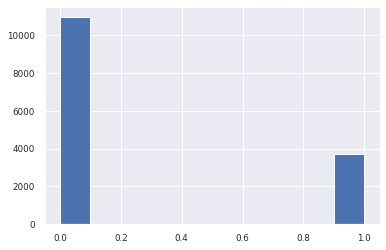

In [442]:
### analyzing distribution of dependant variable
plt.hist(df[df.columns[-1]])

In [443]:
df[df.columns[-1]].value_counts()/len(df)

0    0.747865
1    0.252135
Name: complication, dtype: float64

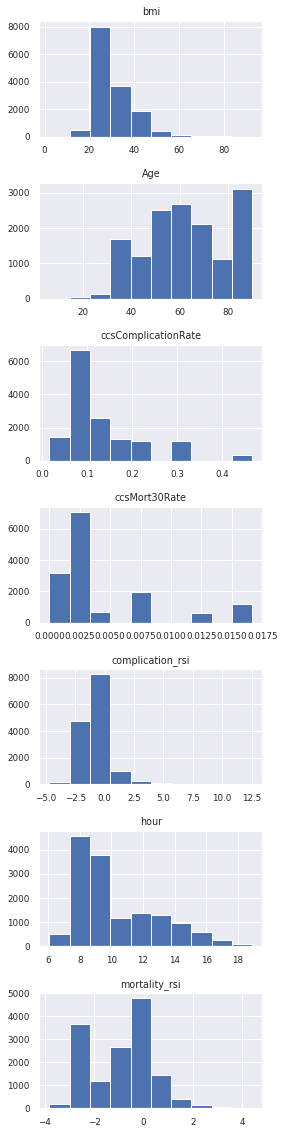

In [444]:
### analyzing distribution of numerical variables
sns.set(font_scale = 0.8)
list_float_variables = df.select_dtypes(include = "float").columns.tolist()
fig, axis = plt.subplots(nrows = len(list_float_variables), ncols = 1, figsize = (4, 20))
i = 0
for column in list_float_variables:
  axis[i].hist(df[column])
  axis[i].set_title(str(column))
  i+=1

plt.subplots_adjust(hspace = 0.4)

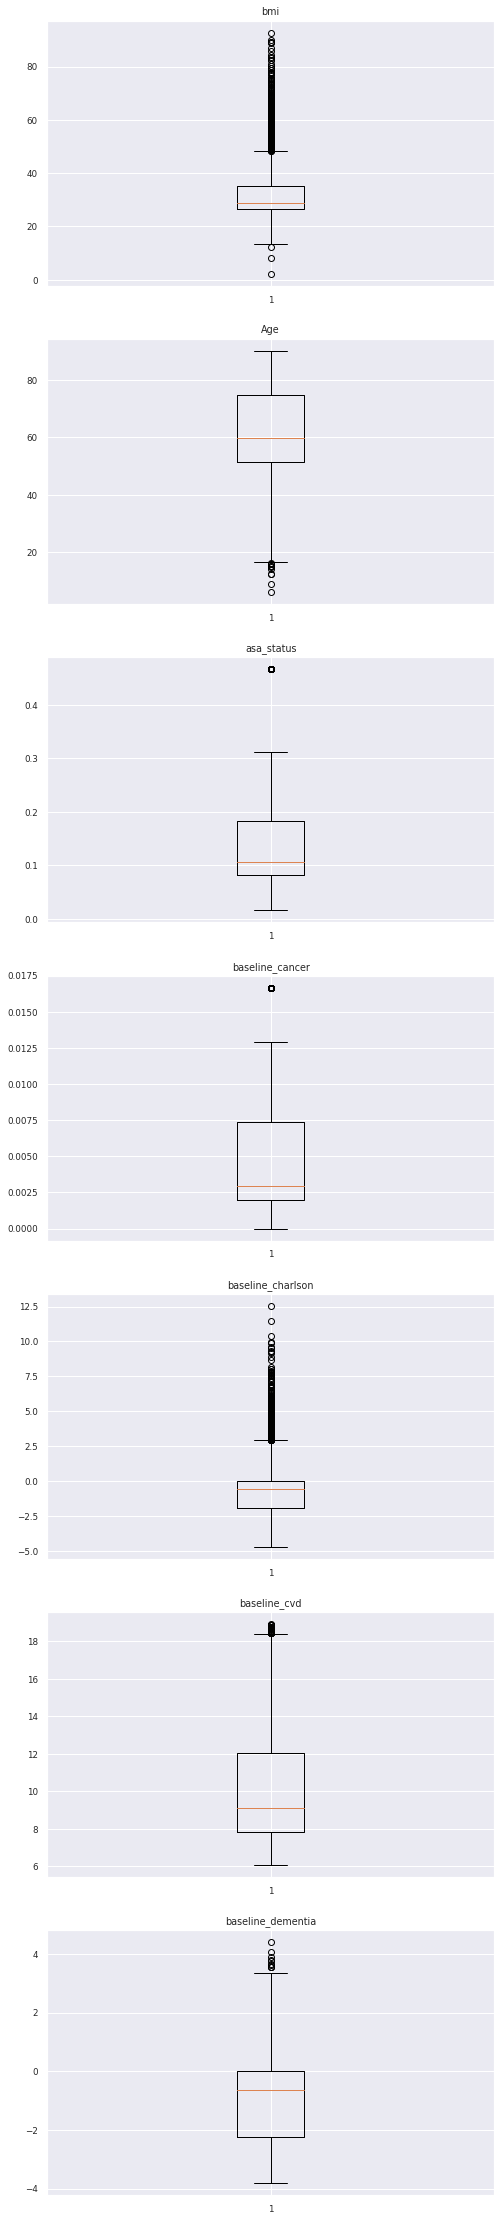

In [445]:
figure, axis = plt.subplots(len(list_float_variables), 1)
figure.set_figheight(40)
figure.set_figwidth(8)
i = 0
for column in list_float_variables:
  axis[i].boxplot(df[column])
  axis[i].set_title(df.columns[i])
  i+=1

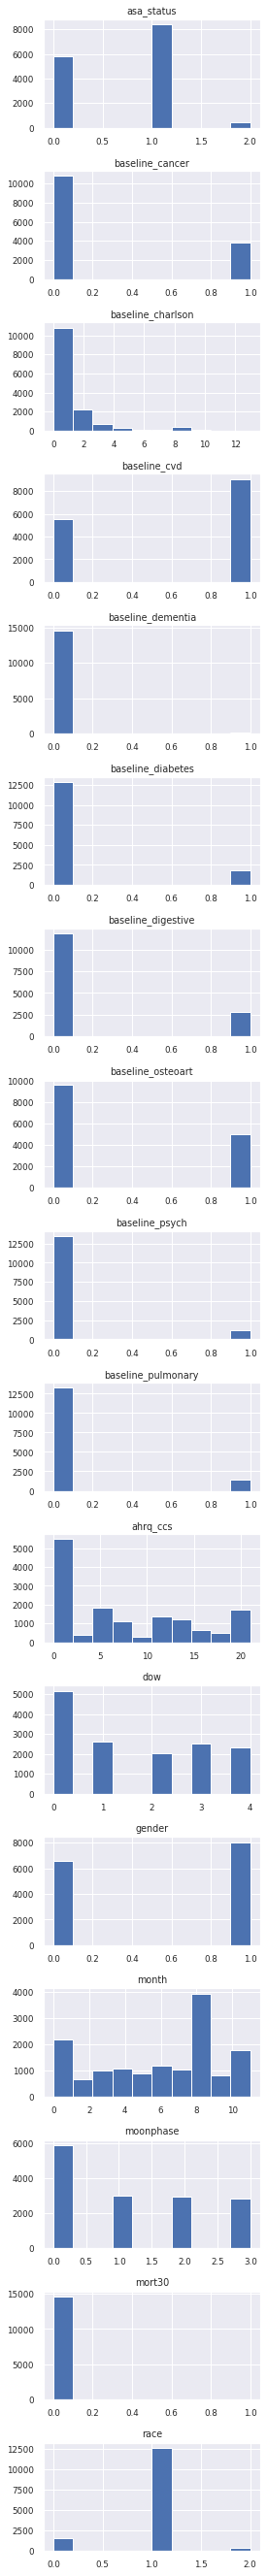

In [446]:
### analyzing distribution of categorical variables
sns.set(font_scale = 0.8)
list_int_variables = df.select_dtypes(include = "int").columns.tolist()[:-1]
fig, axis = plt.subplots(nrows = len(list_int_variables), ncols = 1, figsize = (4, int(20*(len(list_int_variables)/len(list_float_variables)))))
i = 0
for column in list_int_variables:
  axis[i].hist(df[column])
  axis[i].set_title(str(column))
  i+=1

plt.subplots_adjust(hspace = 0.4)

In [447]:
df["baseline_dementia"].value_counts()/len(df)

# drop column

0    0.995149
1    0.004851
Name: baseline_dementia, dtype: float64

In [448]:
df["mort30"].value_counts()/len(df)

# drop column

0    0.996037
1    0.003963
Name: mort30, dtype: float64

In [449]:
df["asa_status"].value_counts()/len(df)

# not merging due to variable meaning- correlated heavily with patients health

1    0.573283
0    0.397198
2    0.029518
Name: asa_status, dtype: float64

In [450]:
df.baseline_charlson.value_counts()/len(df)

# merge into 0, 1, 2 and rest

0     0.605945
2     0.153809
1     0.134062
3     0.047011
8     0.023369
4     0.016262
9     0.005603
6     0.004715
5     0.004715
10    0.001913
7     0.001845
11    0.000615
13    0.000068
12    0.000068
Name: baseline_charlson, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


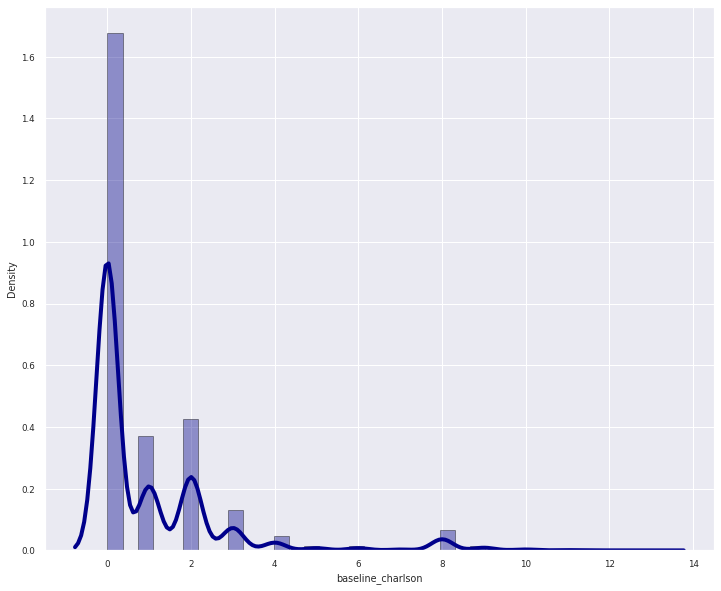

In [451]:
figure = plt.figure(figsize = (12, 10))
sns.distplot(df.baseline_charlson, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [452]:
df.race.value_counts()/len(df)

# merge 0 & 2

1    0.86054
0    0.11001
2    0.02945
Name: race, dtype: float64

In [453]:
df_clean = df.drop(columns = ["baseline_dementia", "mort30", "hour", "ahrq_ccs", "month"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


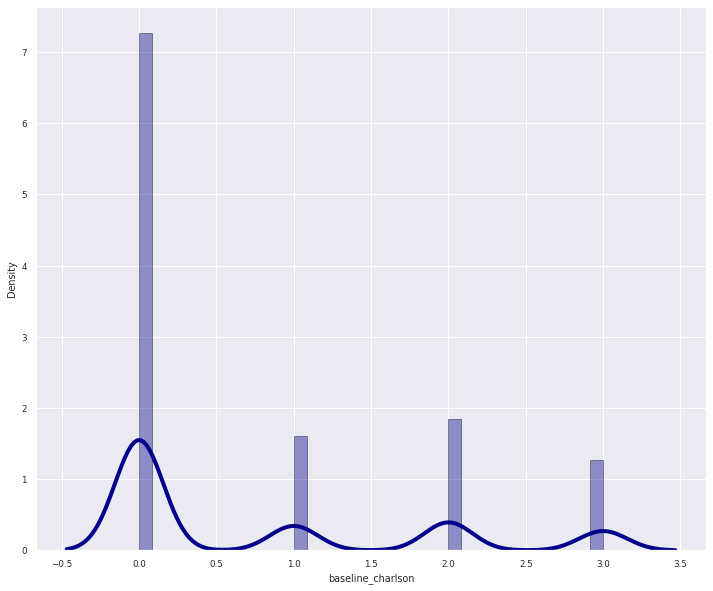

In [454]:
df_clean["baseline_charlson"] = np.where(df["baseline_charlson"] >=3, 3, df["baseline_charlson"])
figure = plt.figure(figsize = (12, 10))
sns.distplot(df_clean.baseline_charlson, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [455]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,14635.0,31.295642,8.152709,2.150000,26.510000,28.980000,35.295000,92.590000
Age,14635.0,63.205268,18.088191,6.100000,51.500000,59.700000,74.700000,90.000000
asa_status,14635.0,0.632320,0.539952,0.000000,0.000000,1.000000,1.000000,2.000000
baseline_cancer,14635.0,0.262316,0.439909,0.000000,0.000000,0.000000,1.000000,1.000000
baseline_charlson,14635.0,0.760232,1.061639,0.000000,0.000000,0.000000,2.000000,3.000000
baseline_cvd,14635.0,0.620294,0.485330,0.000000,0.000000,1.000000,1.000000,1.000000
baseline_diabetes,14635.0,0.120875,0.325993,0.000000,0.000000,0.000000,0.000000,1.000000
baseline_digestive,14635.0,0.189546,0.391955,0.000000,0.000000,0.000000,0.000000,1.000000
baseline_osteoart,14635.0,0.342740,0.474642,0.000000,0.000000,0.000000,1.000000,1.000000
baseline_psych,14635.0,0.082405,0.274990,0.000000,0.000000,0.000000,0.000000,1.000000


In [456]:
df_int = df_clean.iloc[:, :-1].select_dtypes(include = "int")
df_clean = pd.get_dummies(df_clean, columns = df_int.columns.tolist(), drop_first = True)

In [457]:
df_clean["complication"]=df.complication

In [458]:
X, y = df_clean.loc[:, df_clean.columns != "complication"], df_clean.loc[:, df_clean.columns == "complication"]

In [459]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [460]:
y_train.value_counts()/len(y_train)

complication
0               0.745705
1               0.254295
dtype: float64

In [461]:
### using SMOTE to balance training data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
smt = SMOTE(random_state=42, sampling_strategy = 0.5)


X_train, y_train = smt.fit_resample(X_train, y_train)

In [462]:
y_train.value_counts()/len(y_train)

complication
0               0.666696
1               0.333304
dtype: float64

In [463]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score  
rfc = RandomForestClassifier()
y_train = np.ravel(y_train)
rfc.fit(X_train, y_train)
decision = rfc.predict(X_test)
values = [accuracy_score(y_test, decision), 
f1_score(y_test, decision),
precision_score(y_test, decision),
recall_score(y_test, decision)]
names = ["accuracy", "f1", "precision", "recall"]
values_names = dict(zip(names, values))
values_names

{'accuracy': 0.8667729446595308,
 'f1': 0.7022900763358778,
 'precision': 0.7840909090909091,
 'recall': 0.6359447004608295}

In [464]:
from sklearn.model_selection import GridSearchCV
param_grid = [{"n_estimators": [100, 200, 300, 400, 500, 600],
              "max_features": ["sqrt", "log2", None],
              }]

In [465]:
grid_search = GridSearchCV(rfc, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_features': ['sqrt', 'log2', None],
                          'n_estimators': [100, 200, 300, 400, 500, 600]}],
             verbose=1)

In [466]:
grid_search.best_params_

{'max_features': None, 'n_estimators': 200}

In [467]:
rfc_optimized = RandomForestClassifier(max_features = None, n_estimators=400)
rfc_optimized.fit(X_train, y_train)
decision = rfc_optimized.predict(X_test)
values = [accuracy_score(y_test, decision), 
f1_score(y_test, decision),
precision_score(y_test, decision),
recall_score(y_test, decision)]
names = ["accuracy", "f1", "precision", "recall"]
values_names = dict(zip(names, values))
values_names

{'accuracy': 0.9007059895240264,
 'f1': 0.7786802030456853,
 'precision': 0.8666666666666667,
 'recall': 0.7069124423963133}